<a href="https://colab.research.google.com/github/ridersw/Computer-Vision/blob/main/CS_663_Exercise_3_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Load the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # to display the images
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

Step 2: Load the Images

In [ ]:
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
       "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
      "https://placekitten.com/800/571"]

for url in urls:
  image = io.imread(url)
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  final_frame = cv.hconcat((image, image_2))
  cv2_imshow(final_frame)
  print('\n')

TODO #1: Read an image from URL and display it

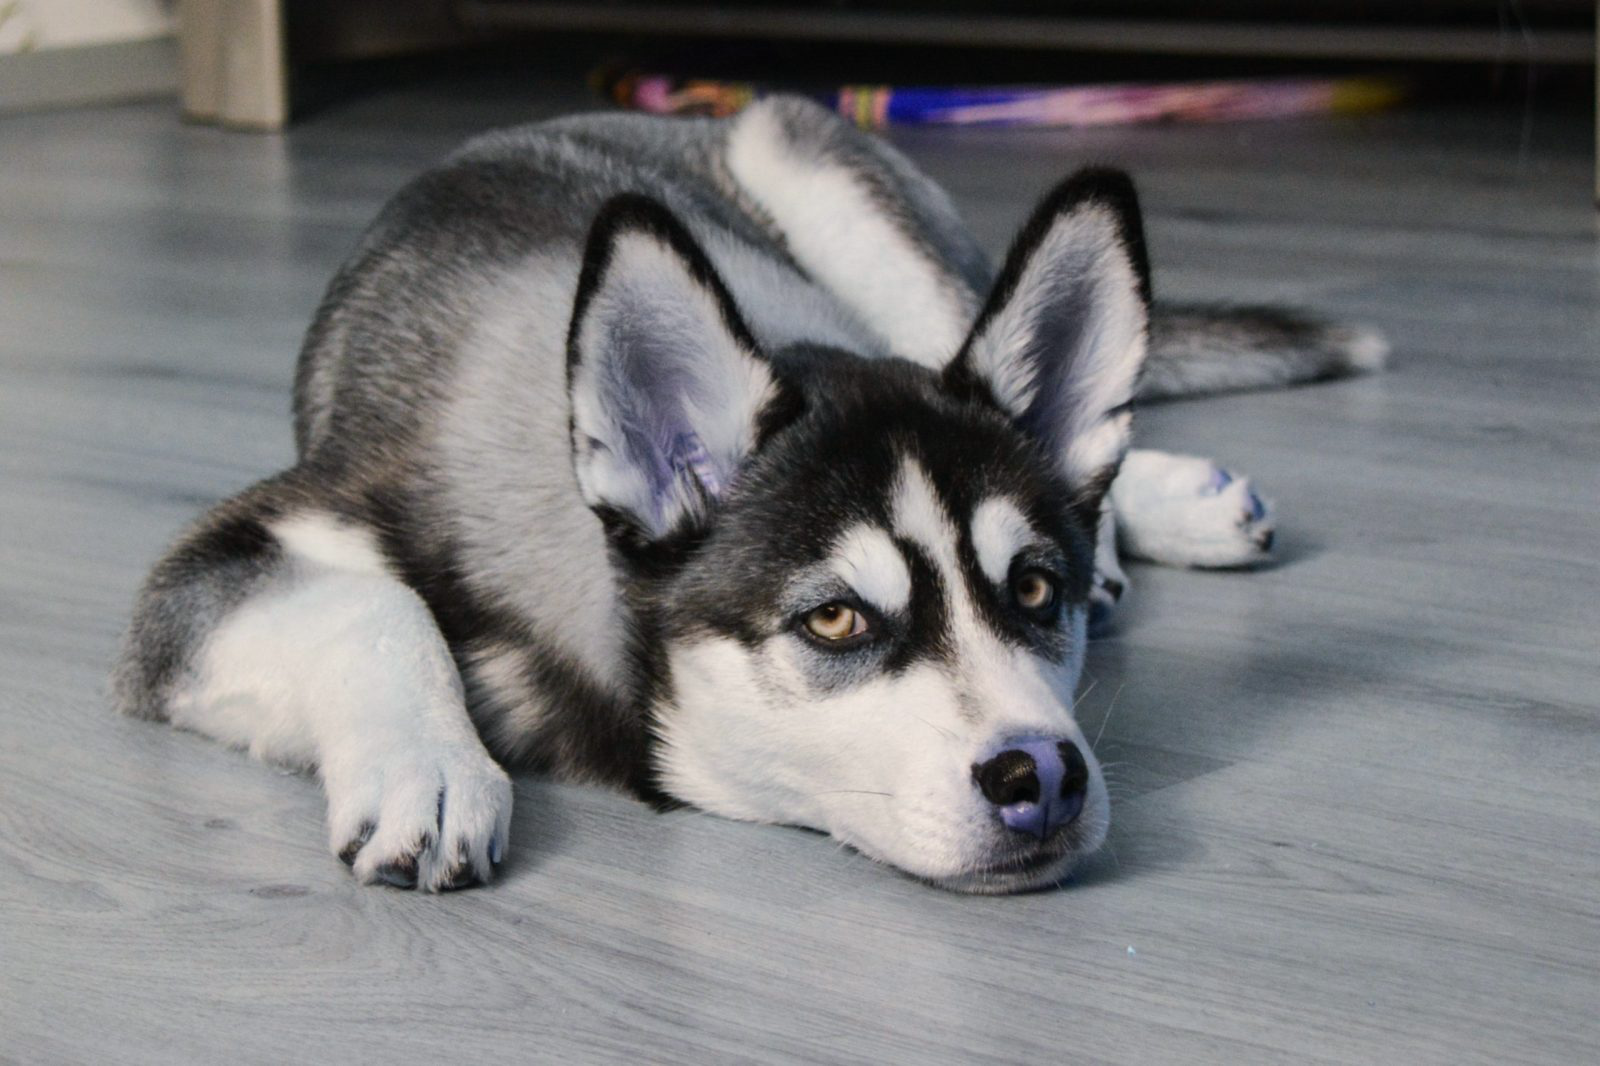

In [ ]:
url = "https://149366112.v2.pressablecdn.com/wp-content/uploads/2022/09/shutterstock_1668693226-scaled-e1662762589120.jpg"
todo_image = io.imread(url)
cv2_imshow(todo_image)

Step 3: Image Contours and Histograms

In [ ]:
print(image.dtype) #data-type
print(image.shape[0]) #height
print(image.shape[1]) #width
print(image.shape[2]) #channels of the image (RGB- 3 Channels, Grayscale- 1 Channel)

uint8
571
800
3


Generate histogram of color image and grayscale image

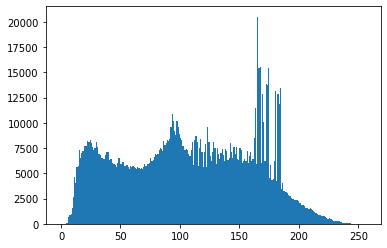

In [ ]:
plt.hist(image.ravel(), bins = 256, range = [0,256])
#ravel()- Use to flatten the 2-dimensional or multi-dimensional array
# bins - determines number of "bins" used to plot histogram
# range - range of values each pixel in the image can have
plt.show()

Display Histogram of R, G, B channel

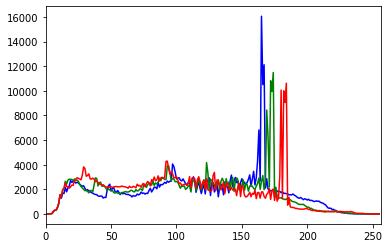

In [ ]:
color = ('b','g','r')
for swi, col in enumerate(color):
  histr = cv.calcHist([image], [swi], None, [256], [0,256])
  plt.plot(histr, color = col)
  plt.xlim([0, 256])
plt.show()

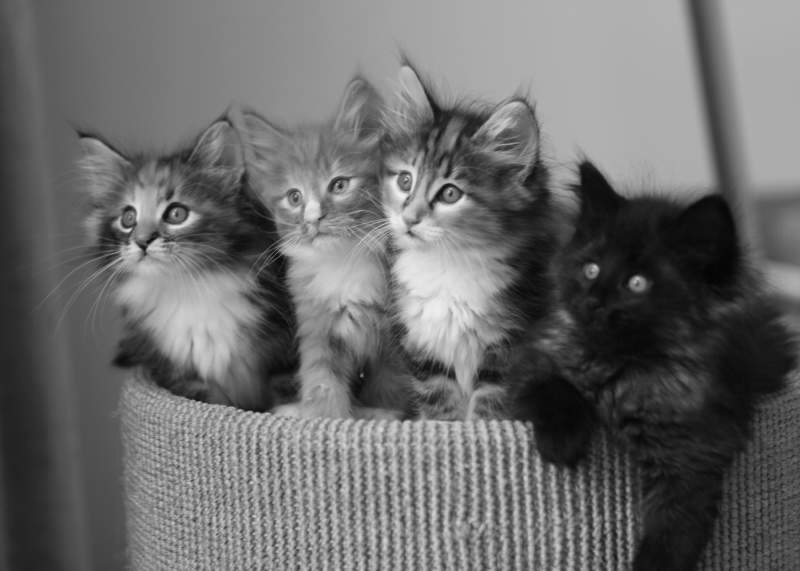

In [ ]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

Histogram of Gray Image

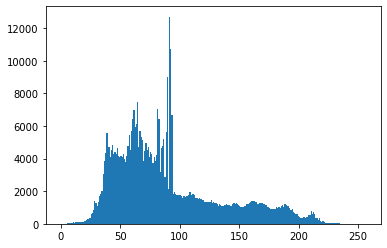

In [ ]:
plt.hist(gray_image.ravel(), bins = 256, range = [0, 256])
plt.show()

TODO #2: Display the Grayscale of your color image and generate histogram

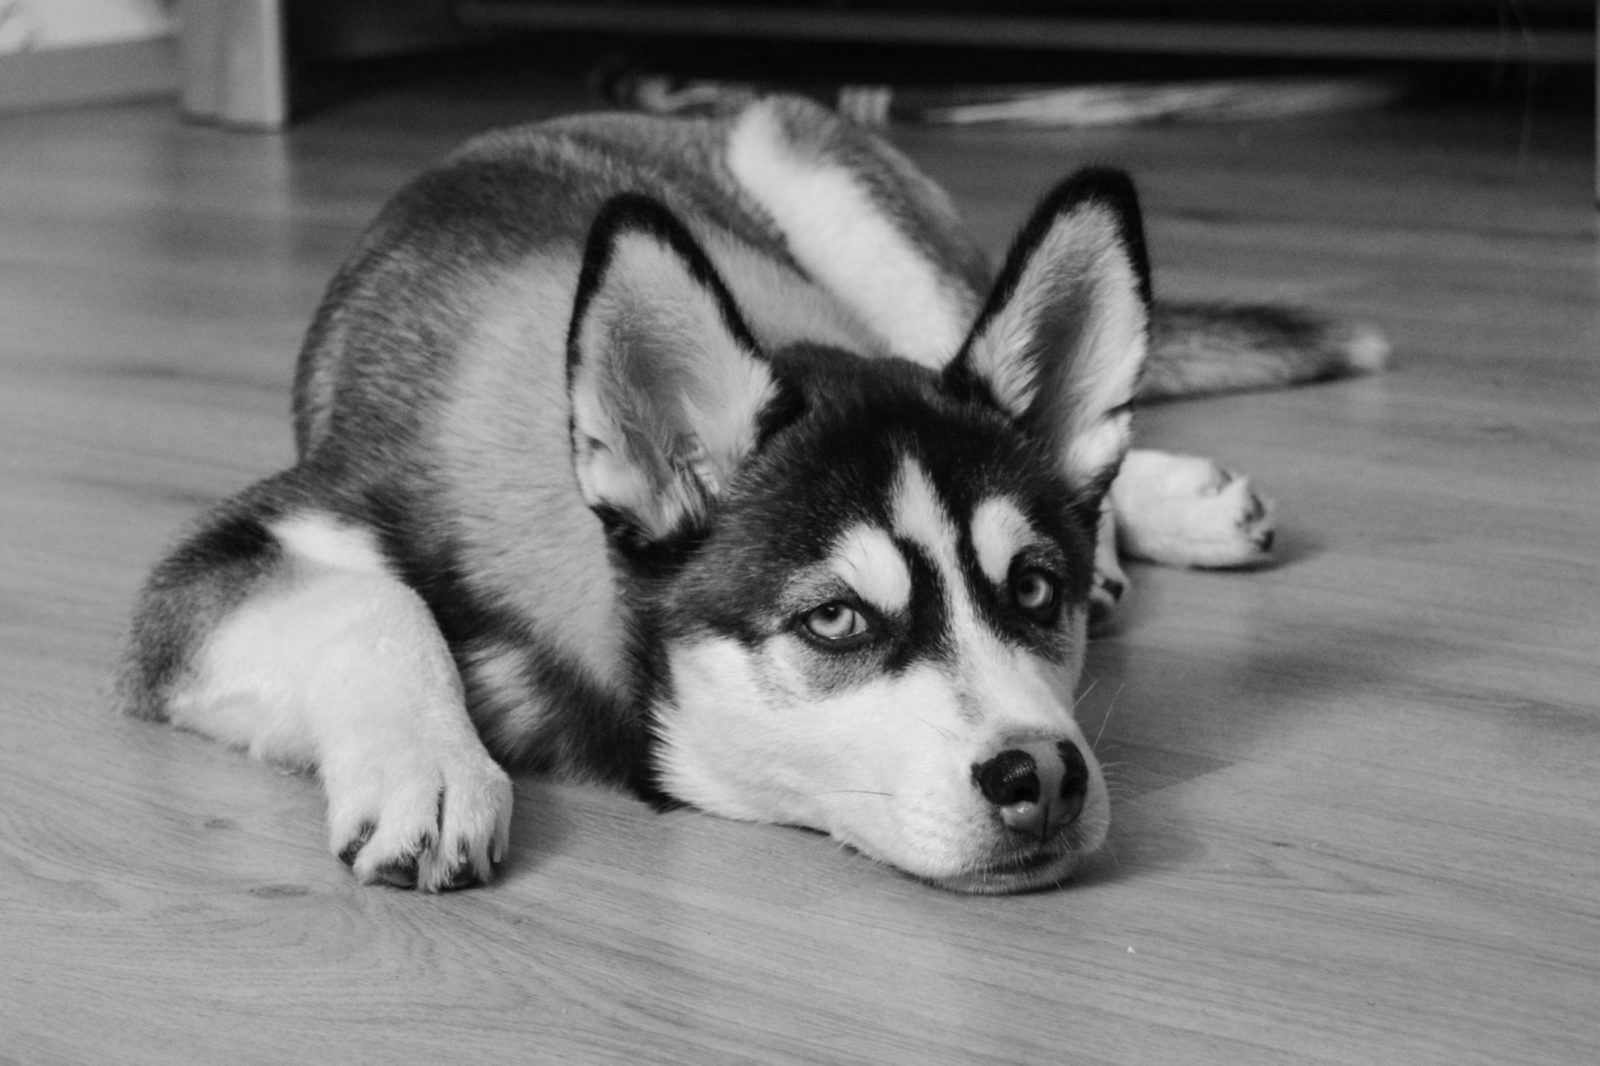

In [ ]:
todo_image_gray = cv.cvtColor(todo_image, cv.COLOR_BGR2GRAY)
cv2_imshow(todo_image_gray)

Find Image Contour of a Grayscale image- 
The outline basically

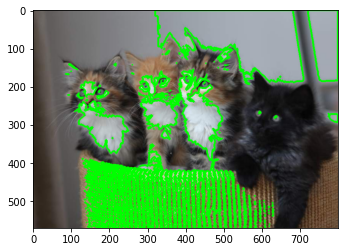

In [ ]:
# Set threshold for the countour detection
ret, thresh = cv.threshold(gray_image,150,255,0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(image, contours, -1, (0, 255, 0), 3)
plt.imshow(image)

TODO #3: Find the contour of your own image

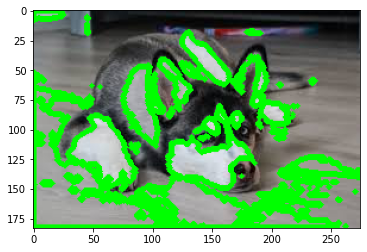

In [ ]:
ret, thresh = cv.threshold(todo_image_gray, 150, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(todo_image, contours, -1, (0, 255, 0), 3)
plt.imshow(todo_image)

Step 4: grayscale Transform and Histogram Equilization

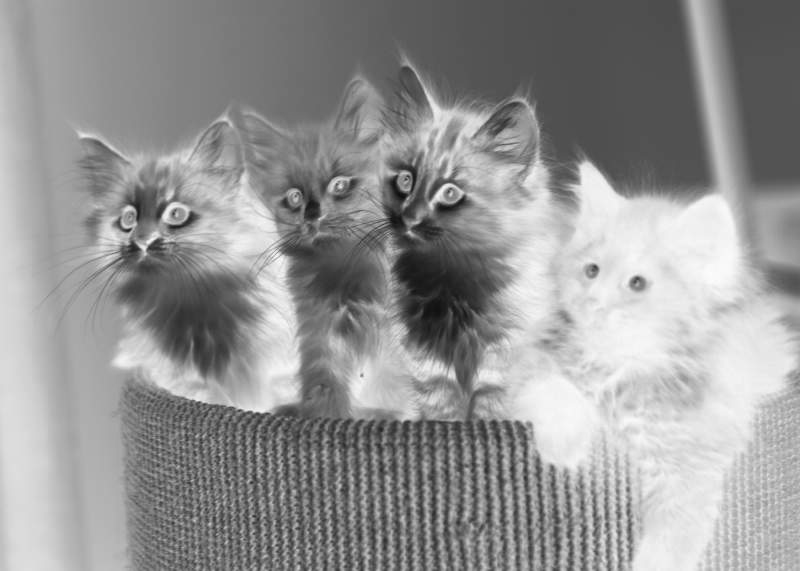

In [ ]:
im2 = 255 - gray_image #inverse operation of grayscale
cv2_imshow(im2)

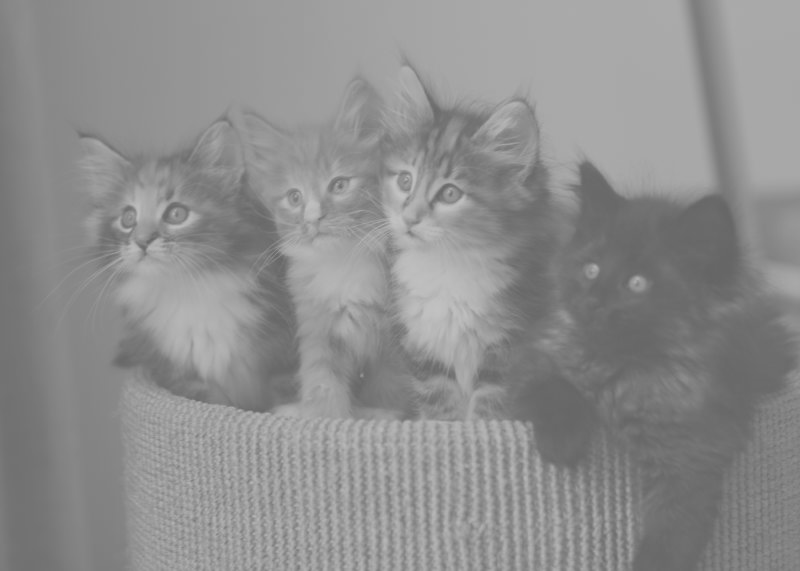

In [ ]:
im3 = (100.9/ 255)*gray_image + 100 #After adding constant
cv2_imshow(im3)

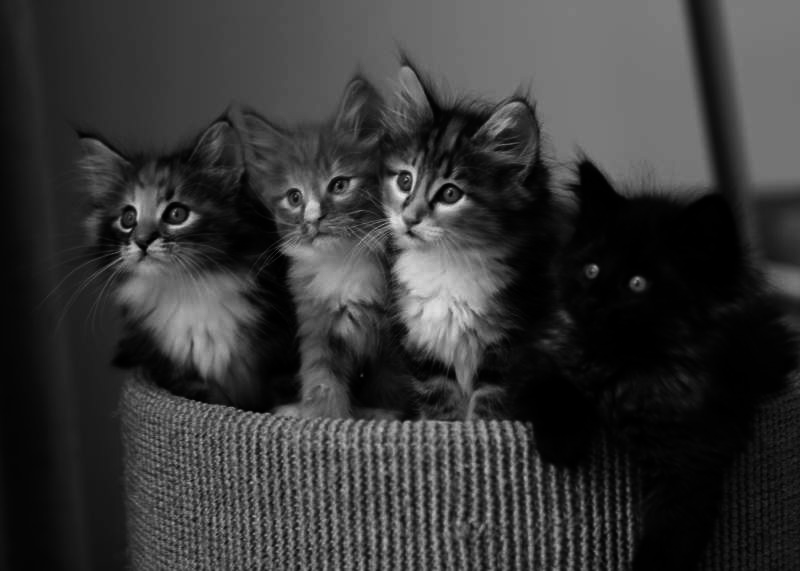

In [ ]:
im4 = 255.0 * (gray_image / 255.0) ** 2
cv2_imshow(im4) 

TODO #4: Try some mathematical operations on your image

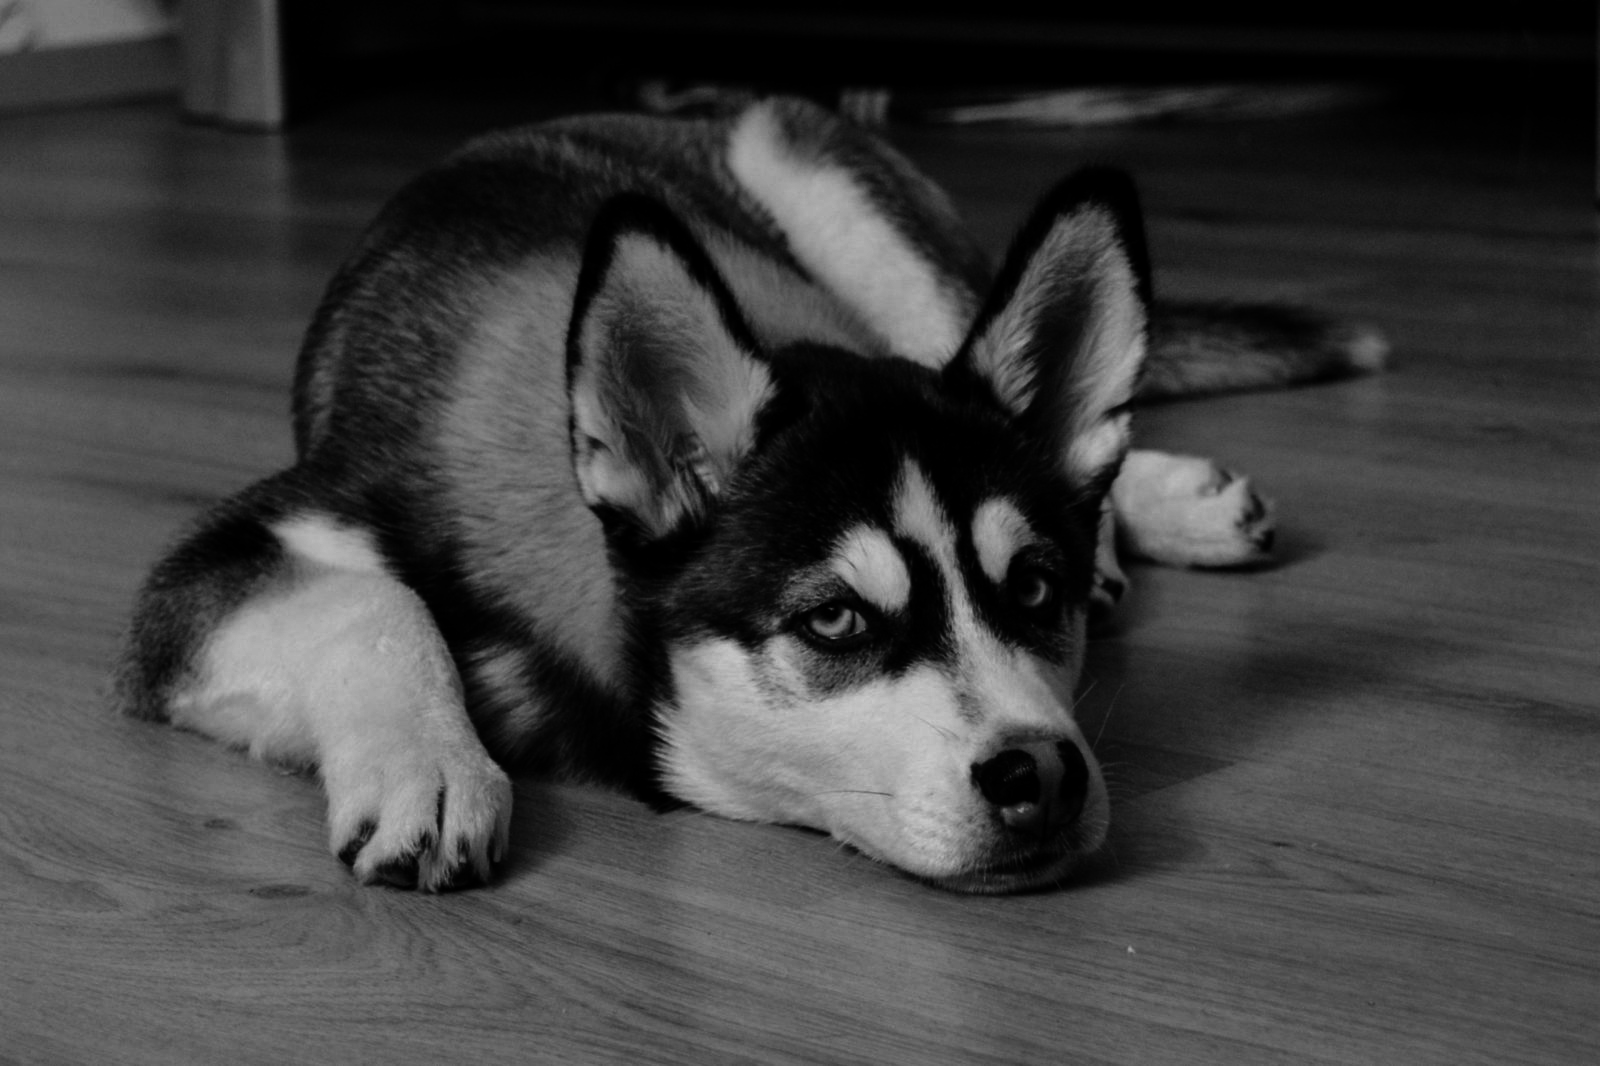

In [ ]:
todo_image_transform = 240.0 * (todo_image_gray / 255.0) ** 2 # less the number, darker is the image
cv2_imshow(todo_image_transform) 

Histogram Equilization- This transform flattens the gray-level histogram so that all intensities are equally common as possible

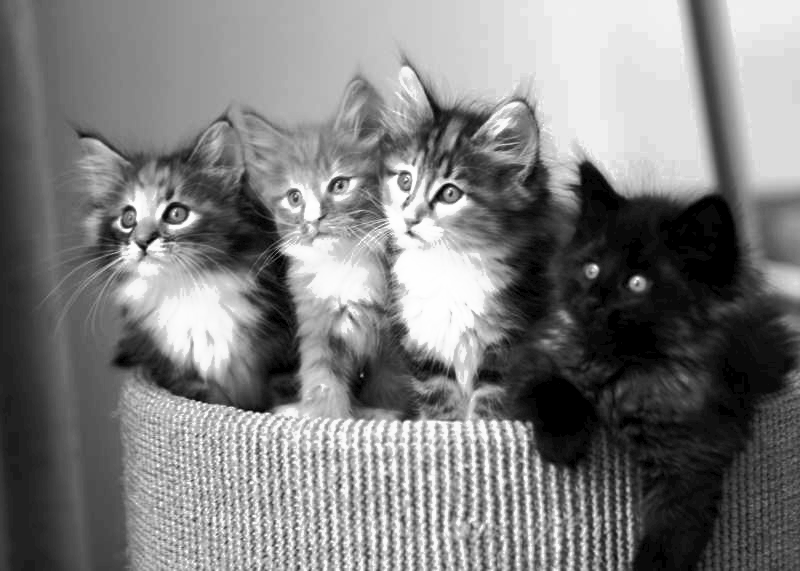

In [ ]:
def histeq(im, nbr_bins = 256):
  # Firstly, get the the image histogram
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = imhist.max()*cdf/cdf.max()  #normalize
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]

# to increase the contrast of above image, apply this function.
im5 = histeq(im4)
cv2_imshow(im5)

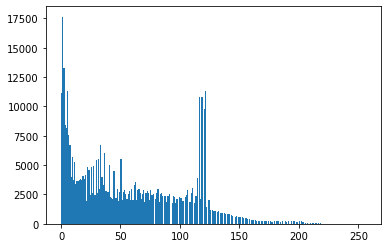

In [ ]:
#before Equilization
plt.hist(im4.ravel(), bins = 256, range = [0, 256])
plt.show()

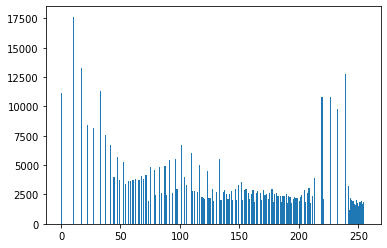

In [ ]:
#after Equilization
plt.hist(im5.ravel(), bins = 256, range = [0, 256])
plt.show()

TODO #5: Do a histogram equilization on your grayscale image

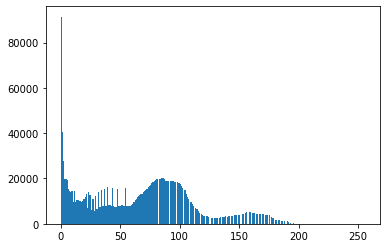

In [ ]:
todo_image_eq = histeq(todo_image_transform)
plt.hist(todo_image_transform.ravel(), bins = 256, range = [0, 256])
plt.show()

Step 5: Fourier Transform of Gray Images
It is used to find the frequency domain of the image

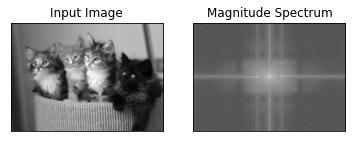

In [ ]:
from matplotlib.pyplot import magnitude_spectrum
imBlur = cv.blur(gray_image, (5, 5)) #blur the grayscale image by Guassian Filter
f = np.fft.fft2(imBlur) # transform the image to frequency domain
fshift = np.fft.fftshift(f) #bring the zero-frequency component to the center
magnitude_spectrum = 30*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

TODO #6: Generate a fourier transform of your grayscale image

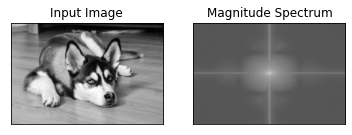

In [ ]:
from matplotlib.pyplot import magnitude_spectrum
todo_image_imBlur = cv.blur(todo_image_gray, (5, 5)) #blur the grayscale image by Guassian Filter
f = np.fft.fft2(todo_image_imBlur) # transform the image to frequency domain
fshift = np.fft.fftshift(f) #bring the zero-frequency component to the center
magnitude_spectrum = 30*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(todo_image_imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

Step 6: Finding Edges by Highpass Filtering in FTT

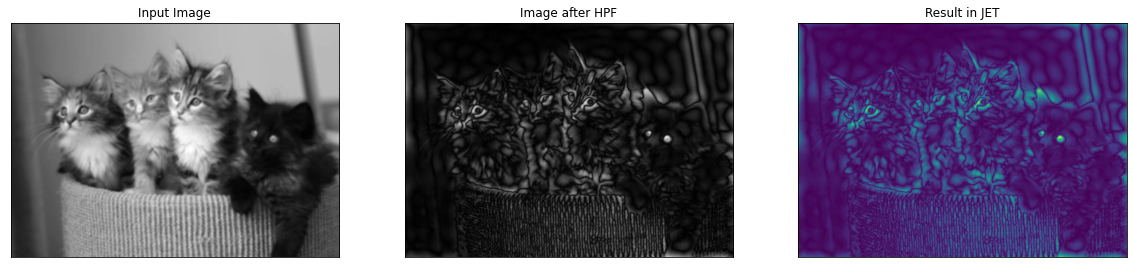

In [ ]:
rows, cols = imBlur.shape
crow,ccol = round(rows/2) , round(cols/2)
# remove low frequencies with a rectangle size of 10
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=([20, 20]))
plt.subplot(131),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

Step 7: Perform Sobel Edge Detection and display the output image

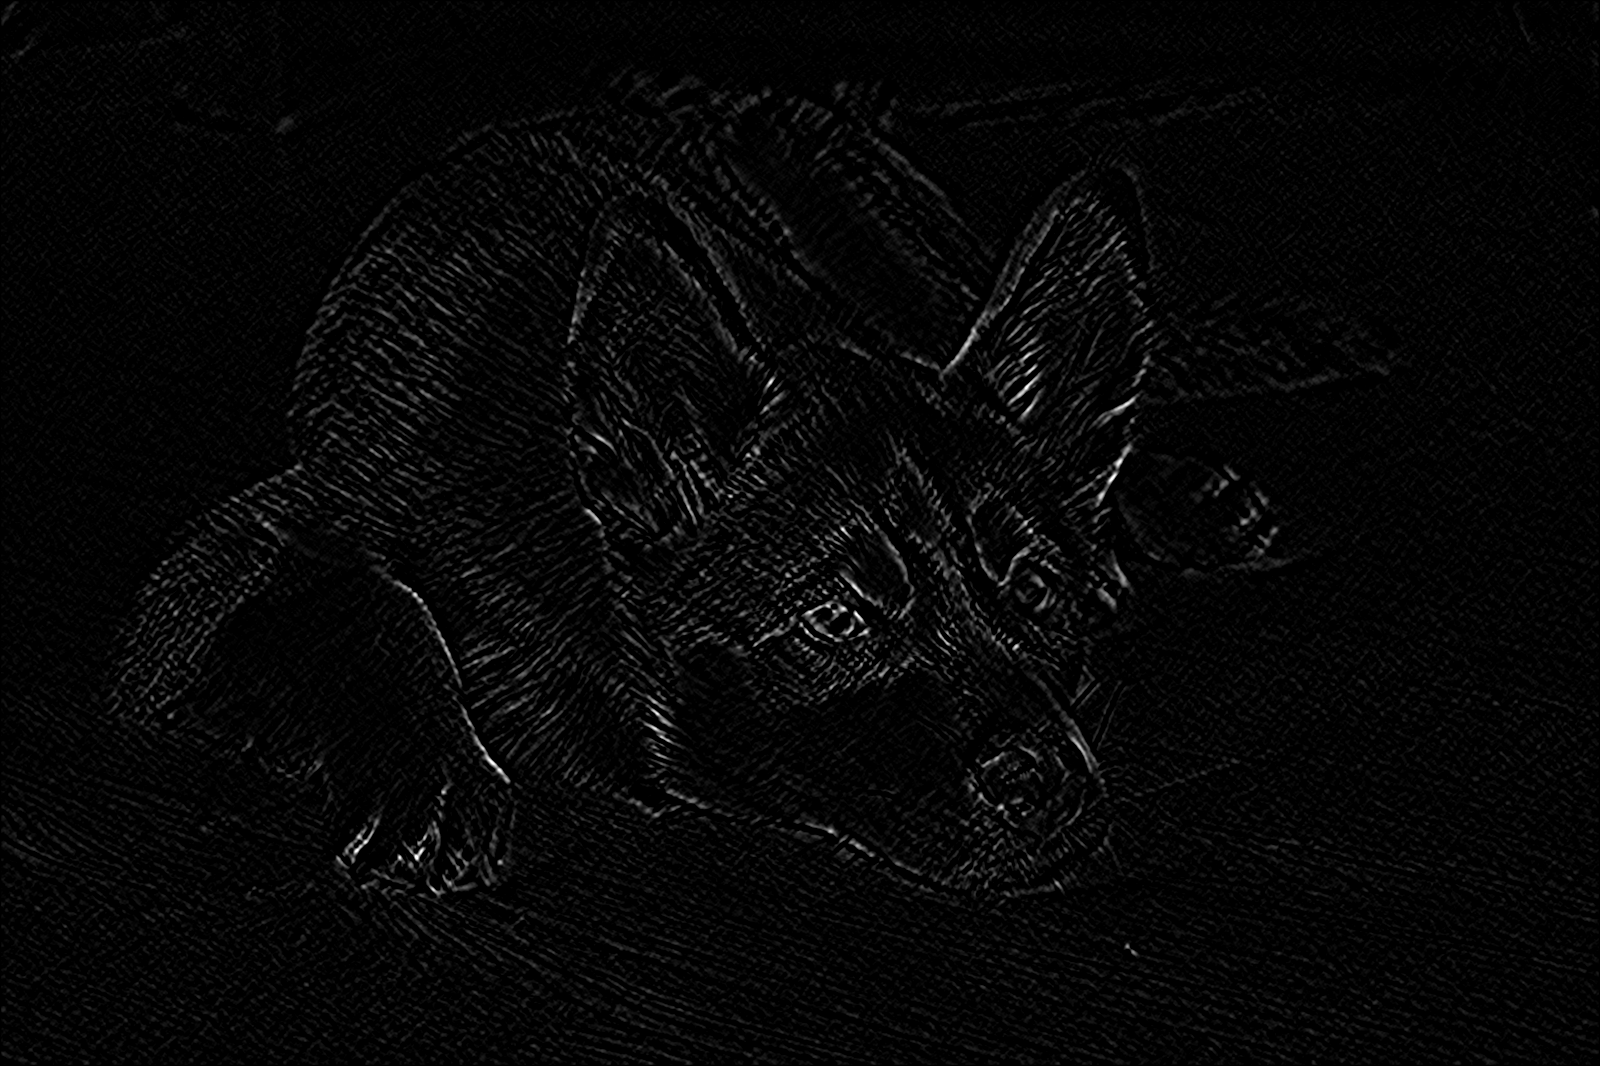

In [ ]:
todo_image_sobel = todo_image_gray
todo_image_blur = cv.blur(todo_image_sobel, (5, 5))
sobelx = cv.Sobel(src=todo_image_blur, ddepth=cv.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv.Sobel(src=todo_image_blur, ddepth=cv.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv.Sobel(src=todo_image_blur, ddepth=cv.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

cv2_imshow(sobelxy)

Step 8: Performs Laplacian of Gaussian Edge Detection (LoG) and display the output image

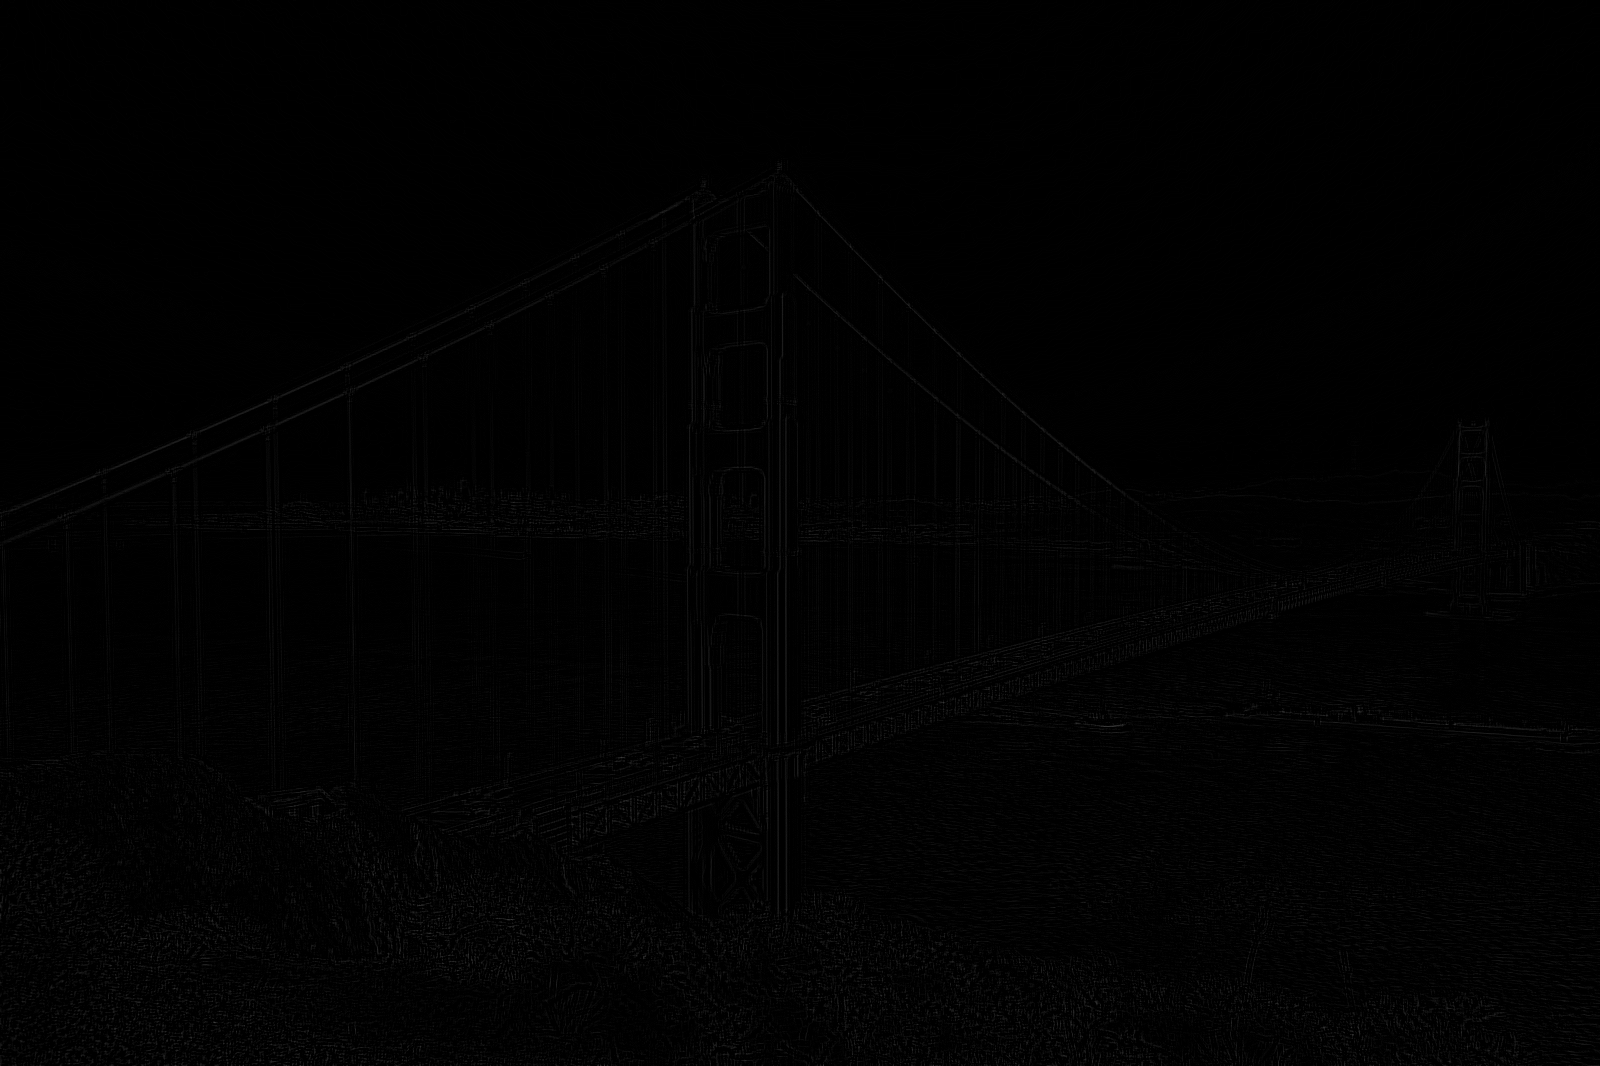

In [ ]:
url = "https://a.cdn-hotels.com/gdcs/production92/d1580/9a28fc70-9bea-11e8-a1b5-0242ac110053.jpg"
todo_image = io.imread(url)
todo_image_gray = cv.cvtColor(todo_image, cv.COLOR_BGR2GRAY)


todo_image_sobel = todo_image_gray
todo_image_blur = cv.blur(todo_image_sobel, (5, 5))
laplacian = cv.Laplacian(todo_image_blur,cv.CV_64F)
cv2_imshow(laplacian)